In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
year = input("Enter year ( 16 - 19)")
month = input("Enter month for 2019 (1-12)") 

Enter year ( 16 - 19) 17
Enter month for 2019 (1-12) 2


In [41]:
pa_th = f"Time series data/f 20{year} {month}.csv"
pa_th

'Time series data/f 2017 2.csv'

In [43]:
df = pd.read_csv(pa_th)

In [45]:
df

,dtm,f
0,2017-02-01 00:00:00 +0000,50.026
1,2017-02-01 00:00:01 +0000,50.023
2,2017-02-01 00:00:02 +0000,50.021
3,2017-02-01 00:00:03 +0000,50.018
4,2017-02-01 00:00:04 +0000,50.010
...,...,...
2419195,2017-02-28 23:59:55 +0000,50.051
2419196,2017-02-28 23:59:56 +0000,50.050
2419197,2017-02-28 23:59:57 +0000,50.051
2419198,2017-02-28 23:59:58 +0000,50.052


In [47]:
df.shape

(2419200, 2)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2419200 entries, 0 to 2419199
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   dtm     object 
 1   f       float64
dtypes: float64(1), object(1)
memory usage: 36.9+ MB


In [51]:
mean_value = df['f'].mean()
mean_value

49.99968570684525

In [53]:
std_dev = df['f'].std()
std_dev

0.06295240719192133

In [55]:
skew_ness = df['f'].skew()
skew_ness

0.17525135990579546

Text(0, 0.5, 'Frequency')

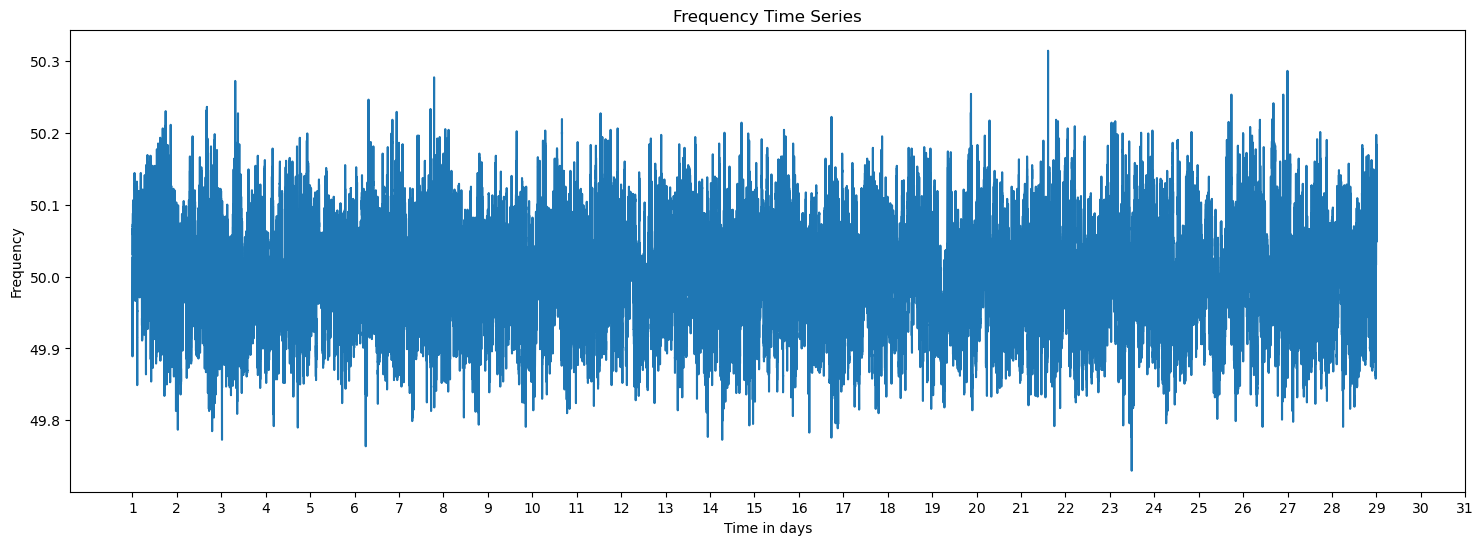

In [59]:
plt.figure(figsize=(18, 6))
plt.plot(df['f'])
plt.xticks(ticks=[i*86400 for i in range(31)], labels=[str(i) for i in range(1, 32)])
plt.title('Frequency Time Series')
plt.xlabel('Time in days')
plt.ylabel('Frequency')

In [161]:
prob_49_9 = (df['f'] < 49.9).mean()
prob_50_1 = (df['f'] > 50.1).mean()


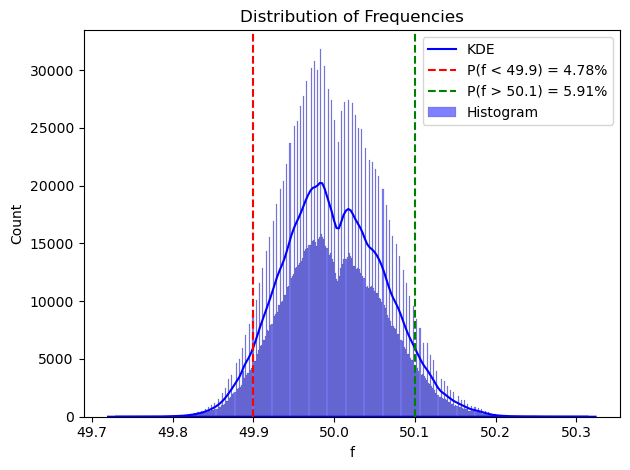

In [163]:
sns.histplot(df['f'], kde =True, label='Histogram', color='blue')
sns.kdeplot(df['f'], color='blue', label='KDE')
plt.axvline(x=49.9, color='red', linestyle='--', label=f'P(f < 49.9) = {prob_49_9:.2%}')
plt.axvline(x=50.1, color='green', linestyle='--', label=f'P(f > 50.1) = {prob_50_1:.2%}')
plt.fill_between(df['f'], 0, 1, where=(df['f'] < 49.9), color='red', alpha=0.2)
plt.fill_between(df['f'], 0, 1, where=(df['f'] > 50.1), color='green', alpha=0.2)
plt.title('Distribution of Frequencies')
plt.legend()
plt.tight_layout()
plt.show()

In [75]:
Q1 = np.percentile(df['f'], 25)
Q3 = np.percentile(df['f'], 75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
up_outliers = df[df['f'] > upper_whisker]
low_outliers = df[df['f'] < lower_whisker]
prob_up = len(up_outliers)/len(df)
prob_low = len(low_outliers)/len(df)

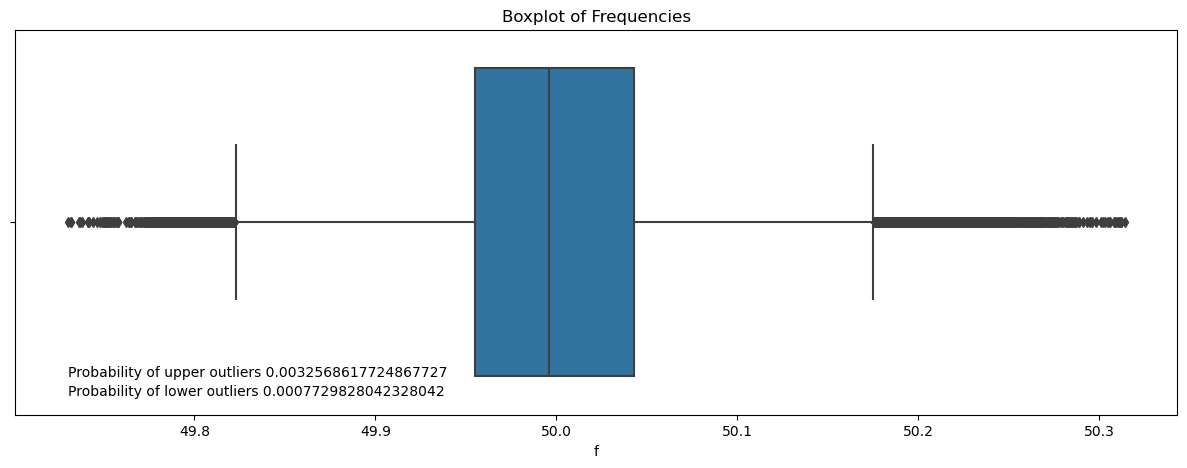

In [167]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['f'])
plt.title('Boxplot of Frequencies')
plt.text(df['f'].min(),0.4, f'Probability of upper outliers {prob_up}', fontsize=10)
plt.text(df['f'].min(),0.45, f'Probability of lower outliers {prob_low}', fontsize=10)
plt.show()